# Вектори и матрице - NumPy

<div>
   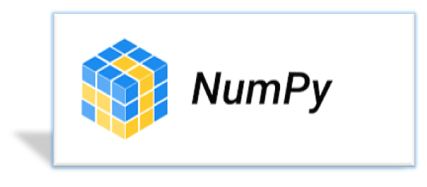  
</div>

Садржај:
1. [Креирање NumPy низова](#Креирање-NumPy-низова)
    1. [Наредба `arange`](#Наредба-arange)
    1. [Наредбе типа `linspace`](#Наредбе-типа-linspace)
    1. [Јединична матрица `eye`](#Јединична-матрица)
    1. [Дијагоналне матрице `diag`](#Дијагоналне-матрице)
    1. [Нула-матрица `zeros`](#Нула-матрица)
    1. [Матрица свих јединица `ones`](#Матрица-свих-јединица)
    1. [Троугаоне матрице `tril`, `triu`](#Троугаоне-матрице)
    1. [Вандермондова матрица `vander`](#Вандермондова-матрица)
1. [Атрибути података типа NumPy array](#Атрибути-података-типа-NumPy-array)    

Вектори и матрице су основни објекти рада већине библиотека које се користе за разна израчунавања у служби обраде података. Специјализована израчунавања за рад са векторима и матрицама су имплементирана унутар [NumPy библиотеке](https://numpy.org/doc/stable/reference/routines.html). У оквиру ове библиотеке матрице, вектори или тензори се представљају помоћу NumPy низова - NumPy arrays. Операције које су дефинисане над NumPy array објектима каже се да су векторизоване. [Векторизована израчунавања](https://en.wikipedia.org/wiki/Array_programming) се значајно брже извршавају од секвенцијалне обраде елемената члан-по-члан. NumPy низови се користе за смештај низова нумеричких вредности, представљање вектора, матрица или тензора. NumPy низови су врста података дизајнирана за ефикасан рад са великим скуповима података уз минималан напор корисника. У те сврхе библиотека NumPy поседује велики скуп рутина за креирање, манипулацију и трансформацију NumPy низова. Математичке функције NumPy билиотеке попут `sin` и `sqrt` дизајниране су специјално за примену на низове нумеричких података. Због тога приликом рада са NumPy `array` типом података веома је важно уочити разлику између математичких дефиниција и имплементираних поступака који су дизајнирани са намером да се поступак кодирања минимизира.

У овој радној свесци бавићемо се начином креирања NumPy низова и упознаћемо неке врсте атрибута који прате овај тип података. Вишедимензионални NumPy низови су основни објекти рада у готово свим нумеричким библиотекама Python-a, као и библиотекама за визуелизацију података, или машинског учења. Због тога их кроз наредне Jupiter свеске детаљније обрађујемо. NumPy низови су слични Python типу података листа, али поседују битне различите специфичности. У настваку зваћемо их једноставно низови. Наредбе, тј. функције којима ћемо се бавити кроз радне свеске биће представљене у свом најједноставнијем облику. Већина од тих функција има додатне опције које можете по жељи детаљније упознати претраживањем [документационог центран библиотеке NumPy](https://numpy.org/doc/stable/reference/index.html) или једноставном Google претрагом.

Да бисмо могли да радимо са низовима библиотеке NumPy најпре је неопходно учитати овај основни модул. Нека опште прихваћена скраћеница за NumPy библиотеку је **np**, па ћемо је и овде користити. 

<div class="alert alert-block alert-info">
<b>Напомена:</b> У случају да је NumPy модул другачије учитан, у кодним ћелијама које следе свуда где се појави префикс <b>np</b> потребно је заменити га са <b>numpy</b> или скраћеницом по избору.</div>

In [1]:
import numpy as np

Користићемо повремено графички приказ како би боље разумели резултате појединих функција над низовима. Због тога учитавамо и библиотеку за графичко представљање.

In [2]:
import matplotlib as mplb
import matplotlib.pyplot as plt

## Креирање NumPy низова

NumPy низови су листе бројева наведене између угластих заграда `[]` и декларишу се помоћу резервисане речи `array` (numpy.array).
За креирање објеката овог типа постоји више различитих начина. Најосновнији јесте експлицитно навођење свих елемената низа. 

Наредном кодном ћелијом генерише се једнодимензионални NumPy низ, објекат који по карактеристикама одговара математичком појму уређене $n-$торке бројева,
$$(a_0,a_1,\dots,a_{n-1})\in\mathbb{R}^n\quad \mbox{ или }\quad (a_0,a_1,\dots,a_{n-1})\in\mathbb{C}^n.$$

In [3]:
prvi_vektor=np.array([1,-1,2,3.5,0])  #generisanje uređene petorke brojeva
prvi_vektor

array([ 1. , -1. ,  2. ,  3.5,  0. ])

In [4]:
print(prvi_vektor)

[ 1.  -1.   2.   3.5  0. ]


<div class="alert alert-block alert-info">
<b>Напомена:</b> Уочити разлику у начину исписа низова. Када се позива преглед садржаја само по имену низа појављује се резервисана реч <b>array</b> и елементи се одвајају зарезима. Излаз наредбе <b>print</b> исписује елементе без зареза и без резервисане речи <b>array</b>.</div>

Да би уређена $n-$торка постала вектор-врста или вектор-колона 
$$\begin{bmatrix} a_{0}&a_{1}&\dots&a_{n-1}\end{bmatrix},\qquad
\begin{bmatrix} a_{0}\\a_{1}\\\vdots\\a_{n-1}\end{bmatrix}
,$$
осим броја елемената $n$ потребна је информација о још једној димензији - начину простирања тих елемената. Другим речима овакви објекти у NumPy array типу података морају да се опишу као дводимензионални низови - матрице. Ово је веома битна разлика која може да утиче на начин израчунавања у појединим функцијама уколико се математичке формуле дословно кодирају. Ова разлика биће јаснија кроз упознавање [атрибута](#Atributi-podataka-tipa-NumPy-array) array типа података.

Матрице су дводимензионална варијанта NumPy низова. Другим речима, матрица је низ чији су елементи низови истих дужина. Ти поднизови су врсте одговарајуће матрице. Због тога кажемо да је врста примарна оса рада, тј. Python је препознаје као `axis=0`. Колоне због тога носе ознаку `axis=1`. За NumPy низове са више димензија овакве ознаке оса се настављају кроз даљу нумерацију.

<div>
   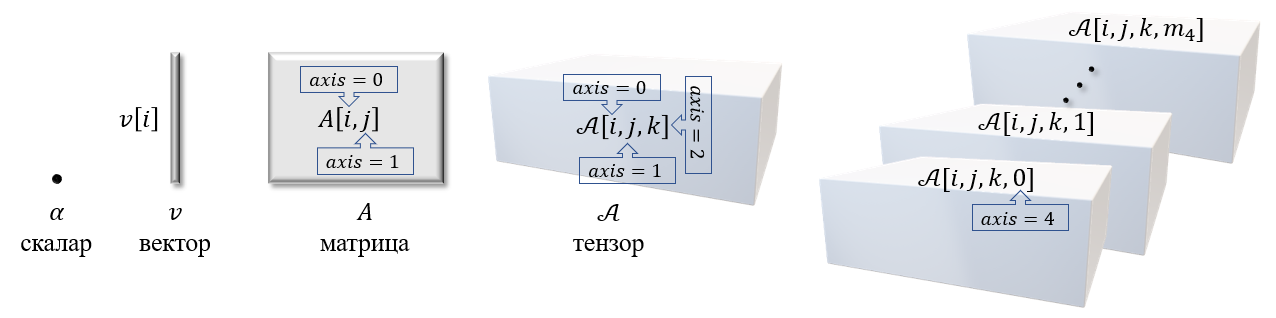  
</div>

**Пример 1.** Креираћемо NumPy `array` објекат који би у операцијама линеарне алгебре имао улогу матрице $\begin{bmatrix}1&2&3\\4&5&6\end{bmatrix}.$ Преглед садржаја новог објекта можемо да извршимо позивом по имену креиране променљиве или наредбом `print`.

In [5]:
matrica=np.array([[1,2,3],[4,5,6]])
matrica

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
print(matrica)

[[1 2 3]
 [4 5 6]]


**Пример 2.** Креираћемо NumPy `array` објекат који тумачимо као матрицу-колону $\begin{bmatrix}1\\2\\3\end{bmatrix}.$ То значи да је сваки елемент део посебне врсте.

In [7]:
kolona=np.array([[1],[2],[3]])
print(kolona)

[[1]
 [2]
 [3]]


Свака врста матрице је једнодимензионални NumPy низ, и све врсте једне матрице имају исти број елемената. Елементи низова и поднизова могу бити цели, реални и комплексни бројеви. Комплексни бројеви се у Pythonu препознају по имагинарној јединици $j.$ У наредним примерима обратити пажњу на начин задавања имагинарног дела комплексног броја.

**Пример 3.** Комплексну матрицу $\begin{bmatrix}i&2+i\\0&-1\\2-i&-2i\end{bmatrix},$ $\begin{bmatrix}i&2+i&0&-1&2-1.42i\end{bmatrix}$ или $\begin{bmatrix}i\\1\\3.1+4.2i\\-2i\end{bmatrix}$ формирамо по угледу на претходне примере. Једино се посебно назначава имагинарн део сваког комплексног броја у формату $Im(z)\,j,$ када он постоји. Симбол `j` након бројевне вредности обезбеђује адекватно тумачење Python преводиоца у својству имагинарне јединице.

In [8]:
kompl_matr=np.array([[1j,2+1j],[0,-1],[2-1j,-2j]])
kompl_matr

array([[ 0.+1.j,  2.+1.j],
       [ 0.+0.j, -1.+0.j],
       [ 2.-1.j, -0.-2.j]])

In [9]:
print(kompl_matr)

[[ 0.+1.j  2.+1.j]
 [ 0.+0.j -1.+0.j]
 [ 2.-1.j -0.-2.j]]


In [10]:
kompl_vrsta=np.array([[1j,2+1j,0,-1,2-1.42j]])
kompl_vrsta

array([[ 0.+1.j  ,  2.+1.j  ,  0.+0.j  , -1.+0.j  ,  2.-1.42j]])

In [11]:
kompl_kolona=np.array([[1j],[1],[3.1+4.2j],[-2j]])
kompl_kolona

array([[ 0. +1.j ],
       [ 1. +0.j ],
       [ 3.1+4.2j],
       [-0. -2.j ]])

За креирање вредности имагинарног дела комплексног броја који носи излаз неке математичке функције може да се користи начин као што је приказан наредном кодном ћелијом.

In [12]:
1j*np.sqrt(2)

1.4142135623730951j

За рад са комплексним бројевима NumPy поседује велики избор уграђених функција, као што је нпр. [argument kompleksnog broja](https://numpy.org/doc/stable/reference/generated/numpy.angle.html).

Осим ручног навођења елемената једног NumPy niza, могуће је и његово [аутоматско генерисање](https://numpy.org/doc/stable/reference/routines.array-creation.html) када елементи низа подлежу некој законитости, тј. резултат су неке математичке формуле. Почињемо од једноставнијих примера, када су чланови низа елементи аритметичког низа бројева. 

### Наредба arange

Prva od naredbi koju upoznajemo je [arange](https://numpy.org/devdocs/reference/generated/numpy.arange.html). Ovom naredbom se generiše niz ekvidistantnih (na jednakom rastojanju) vrednosti unutar zadatog opsega sa tačno definisanim razmakom. Nareba `arange` koristi se kada je veličina koraka između elemenata niza bitna, tj. nekim uslovom unapred definisana vrednost. Sintaksa ove naredbe podrazumeva obavezne i opcione argumente prilikom poziva:

```python
numpy.arange([pocetna_vrednost=0,] granica [,korak=1])
```

Uglastim zagradama naznačene su opcione vrednosti, odnosno vrednosti koje nije neophodno navoditi prilikom poziva ove funkcije. Ukoliko argument `početna_vrednost` nije naveden podrazumeva se da je 0. Kada argument `korak` nije naveden, podrazumeva se da je 1. Pozitivnom vrednošću argumenta `korak` generiše se rastući aritmetički niz, a negativnom opadajući. Vrednosti članova aritmetičkog niza koji se kreira naredbom `arange` glase
$$pocetna\_vrednost+k*korak,\qquad k=0,1,\dots,max$$
Primetimo da početna vrednost indeksa $k=0$ opisuje da se $pocetna\_vrednost$ uključuje kao prva u komponente generisanog niza. Poslednja vrednost indeksa $k=max,$ samim tim i broj elemenata niza, određen je uslovom da poslednje generisani član niza ne prelazi vrednost `granica` u smeru kreiranja tog niza (rastući ili opadajući): 
$$ pocetna\_vrednost+max*korak<granica\leq pocetna\_vrednost+(max+1)*korak,\qquad korak>0,$$
i
$$ pocetna\_vrednost+(max+1)*korak<granica\leq pocetna\_vrednost+max*korak,\qquad korak<0.$$
Za rastući niz potrebno je da važi
>pocetna_vrednost < granica

dok za opadajući niz mora biti
>pocetna_vrednost > granica

U suprotnom naredba `arange` vraća prazan niz, tj. niz bez elemenata. 

<div class="alert alert-block alert-info">
<b>Napomena:</b> Primetimo da <b>granica</b> (obavezni argument u pozivu naredbe) ne ulazi u skup vrednosti niza koji se generiše naredbom <b>arange</b>.</div>

Naredne kodne ćelije kroz jednostavne primere ulaza i izlaza opisuju dejstvo naredbe `arange`.

In [13]:
a=np.arange(5)   #pocetna_vrednost=0, korak=1>0, rastući niz
a

array([0, 1, 2, 3, 4])

Приказаћемо елементе низа $a$ и графички.

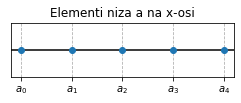

In [17]:
plt.figure(figsize= (3,1))
plt.axhline(color='black', zorder=-1)
plt.plot(a,np.zeros(5),'o')
plt.title("Elementi niza a na x-osi")
plt.xticks(a,[r"$a_0$",r"$a_1$",r"$a_2$",r"$a_3$",r"$a_4$"])
plt.yticks([])
plt.grid(linestyle='--');

In [18]:
b=np.arange(-3,3)    #korak=1>0, rastući niz
b

array([-3, -2, -1,  0,  1,  2])

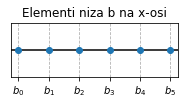

In [19]:
plt.figure(figsize= (4,1))
plt.axhline(color='black', zorder=-1)
plt.plot(b,np.zeros(6),'o')
plt.title("Elementi niza b na x-osi")
plt.xticks(b,[r"$b_0$",r"$b_1$",r"$b_2$",r"$b_3$",r"$b_4$",r"$b_5$"])
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--');

In [20]:
c=np.arange(1,8,2.4)         #korak>0, rastući niz
c

array([1. , 3.4, 5.8])

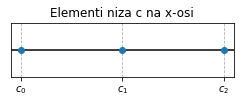

In [25]:
plt.axhline(color='black', zorder=-1)
plt.plot(c,np.zeros(3),'o')
plt.rcParams["figure.figsize"] = (2,1)
plt.title("Elementi niza c na x-osi")
plt.xticks(c,[r"$c_0$",r"$c_1$",r"$c_2$"])
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--');

In [22]:
a=np.arange(3,-3,-1)         #korak<0, opadajući niz
a

array([ 3,  2,  1,  0, -1, -2])

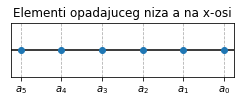

In [24]:
plt.axhline(color='black', zorder=-1)
plt.plot(a,np.zeros(6),'o')
plt.rcParams["figure.figsize"] = (4,1)
plt.title("Elementi opadajuceg niza a na x-osi")
plt.xticks(a,[r"$a_0$",r"$a_1$",r"$a_2$",r"$a_3$",r"$a_4$",r"$a_5$"])
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--');

In [26]:
np.arange(9,1,-3)          #korak<0, opadajući niz

array([9, 6, 3])

In [27]:
np.arange(3,-3)     #prazan niz jer je korak=1>0, a granica-pocetna_vrednost<0 

array([], dtype=int32)

In [28]:
np.arange(1,6,-1)          #prazan niz jer je korak=-1<0, a granica-pocetna_vrednost>0 

array([], dtype=int32)

In [29]:
np.arange(1,2,0)  #nije dozvoljen korak 0

ZeroDivisionError: division by zero

### Наредбе типа linspace

Sledeća naredba kojom se automatski kreiraju elementi niza je [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). Njom se generiše niz ekvidistantnih vrednosti na zadatom segmentu. Pojednostavljena sintaksa naredbe je
```python
numpy.linspace(pocetak, kraj [,n=50])
```
Broj elemenata niza `n` je opcioni argument u pozivu ove funkcije. Ukoliko se ne navede podrazumevana vrednost je $n=50.$

<div class="alert alert-block alert-info">
<b>Napomena:</b> Primetimo da obe granice (pocetak, kraj) ulaze u skup vrednosti niza koji se generiše naredbom <b>linspace</b>.</div>

Ukoliko želimo da gornja granica `kraj` bude isključena iz skupa vrednosti to postižemo opcionim argumentom `endpoint=False`.

In [30]:
a=np.linspace(1,5)  
#n=50 ekvidistantnih vrednosti počevši od 1, zaključno sa 5, korak je h=(kraj-pocetak)/(n-1)
a

array([1.        , 1.08163265, 1.16326531, 1.24489796, 1.32653061,
       1.40816327, 1.48979592, 1.57142857, 1.65306122, 1.73469388,
       1.81632653, 1.89795918, 1.97959184, 2.06122449, 2.14285714,
       2.2244898 , 2.30612245, 2.3877551 , 2.46938776, 2.55102041,
       2.63265306, 2.71428571, 2.79591837, 2.87755102, 2.95918367,
       3.04081633, 3.12244898, 3.20408163, 3.28571429, 3.36734694,
       3.44897959, 3.53061224, 3.6122449 , 3.69387755, 3.7755102 ,
       3.85714286, 3.93877551, 4.02040816, 4.10204082, 4.18367347,
       4.26530612, 4.34693878, 4.42857143, 4.51020408, 4.59183673,
       4.67346939, 4.75510204, 4.83673469, 4.91836735, 5.        ])

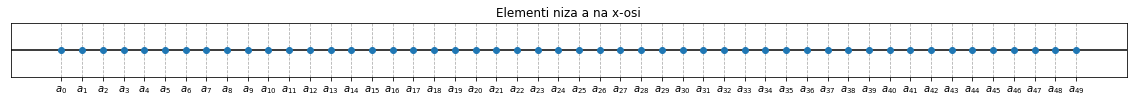

In [33]:
plt.axhline(color='black', zorder=-1)
plt.plot(a,np.zeros(50),'o')
plt.rcParams["figure.figsize"] = (20,1)
plt.title("Elementi niza a na x-osi")
labele=[]
for i in range(50):
    deo=r"$a_{"+str(i)+"}$"
    labele=labele+[deo]
plt.xticks(a,labele)
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--');

In [34]:
b=np.linspace(1,5,endpoint=False)  
#n=50 ekvidistantnih vrednosti počevši od 1, sa korakom h=(kraj-pocetak)/n
b

array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
       1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
       2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
       3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
       4.52, 4.6 , 4.68, 4.76, 4.84, 4.92])

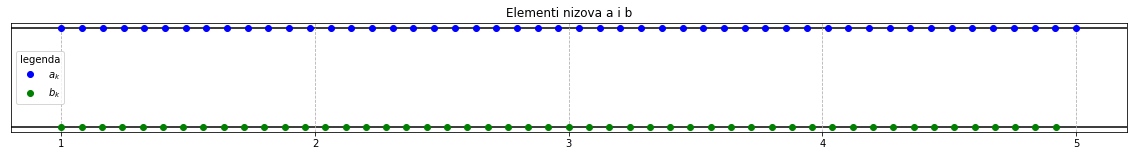

In [36]:
plt.axhline(color='black', zorder=-1)
plt.axhline(y=1, color='black', zorder=-1)
plt.plot(a,np.ones(50),'ob', label=r"$a_k$")
plt.plot(b,np.zeros(50),'og', label=r"$b_k$")
plt.rcParams["figure.figsize"] = (20,2)
plt.title("Elementi nizova a i b")
plt.xticks(range(1,6))
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--')
plt.legend(loc='center left', title='legenda');

In [37]:
a=np.linspace(-1.3,5.4,8) 
#n=8 ekvidistantnih vrednosti počevši od 1, zaključno sa 5, korak je h=(kraj-pocetak)/(n-1)
a

array([-1.3       , -0.34285714,  0.61428571,  1.57142857,  2.52857143,
        3.48571429,  4.44285714,  5.4       ])

In [38]:
b=np.linspace(-1.3,5.4,8,endpoint=False) 
#n=8 ekvidistantnih vrednosti počevši od 1, zaključno sa 5, korak je h=(kraj-pocetak)/n
b

array([-1.3   , -0.4625,  0.375 ,  1.2125,  2.05  ,  2.8875,  3.725 ,
        4.5625])

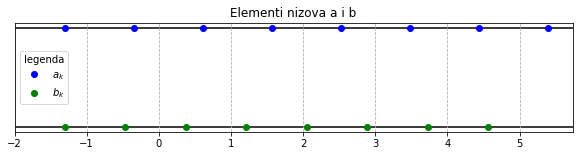

In [40]:
plt.axhline(color='black', zorder=-1)
plt.axhline(y=1, color='black', zorder=-1)
plt.plot(a,np.ones(8),'ob', label=r"$a_k$")
plt.plot(b,np.zeros(8),'og', label=r"$b_k$")
plt.rcParams["figure.figsize"] = (10,2)
plt.title("Elementi nizova a i b")
plt.xticks(range(-2,6))
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--')
plt.legend(loc='center left', title='legenda');

Слично претходној наредби, постоји могућност креирања вектора чији су елементи чланови геометријског низа. Тиме се добијају елементи различите густине вредности. Генерисање елемената геометријског низа постиже се наредбама [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html#numpy.logspace) и [geomspace](https://numpy.org/doc/stable/reference/generated/numpy.geomspace.html). 

Наредба `logspace` prilikom poziva
```python
np.logspace(pocetak, kraj [,n=50] [,base=10]) 
```
kreira geometrijski niz po formuli
$a_0=base^{pocetak},\ a_{n-1}=base^{kraj},$ a svi elementi između su oblika $$a_k=a_0\cdot base^{k\dfrac{kraj-pocetak}{n-1}},\ k=0,1,\dots,n-1. $$

In [46]:
a=np.logspace(0,7,7)   #base=10
a

array([1.00000000e+00, 1.46779927e+01, 2.15443469e+02, 3.16227766e+03,
       4.64158883e+04, 6.81292069e+05, 1.00000000e+07])

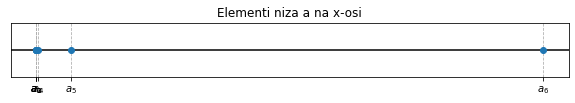

In [48]:
plt.axhline(color='black', zorder=-1)
plt.plot(a,np.zeros(7),'o')
plt.rcParams["figure.figsize"] = (10,1)
plt.title("Elementi niza a na x-osi")
labele=[]
for i in range(7):
    deo=r"$a_{"+str(i)+"}$"
    labele=labele+[deo]
plt.xticks(a,labele)
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--');

In [49]:
b=np.logspace(0,6,8)   #base=10
b

array([1.00000000e+00, 7.19685673e+00, 5.17947468e+01, 3.72759372e+02,
       2.68269580e+03, 1.93069773e+04, 1.38949549e+05, 1.00000000e+06])

In [50]:
c=np.logspace(0,6,10)

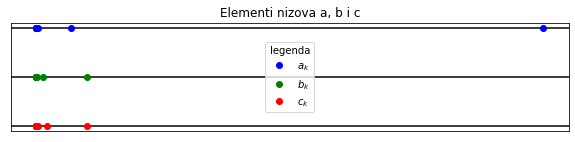

In [52]:
plt.axhline(color='black', zorder=-1)
plt.axhline(y=1, color='black', zorder=-1)
plt.axhline(y=-1, color='black', zorder=-1)
plt.plot(a,np.ones(7),'ob', label=r"$a_k$")
plt.plot(b,np.zeros(8),'og', label=r"$b_k$")
plt.plot(c,-np.ones(10),'or', label=r"$c_k$")
plt.rcParams["figure.figsize"] = (10,2)
plt.title("Elementi nizova a, b i c")
plt.xticks([])
plt.yticks([])
plt.legend(loc='center', title='legenda');

In [53]:
np.logspace(0,8,3,base=2)   #base=2

array([  1.,  16., 256.])

Naredba `geomspace` prilikom poziva sa sintaksom
```python
np.geomspace(pocetak, kraj [,n=50]) 
```
kreira geometrijski niz po formuli
$a_k=a_0*q^k,\qquad   q=\sqrt[n-1]{\dfrac{kraj}{pocetak}},\ a_0=pocetak\neq0.$

In [54]:
a=np.geomspace(1,1000,4)  
a

array([   1.,   10.,  100., 1000.])

In [55]:
1000**(1/3)

9.999999999999998

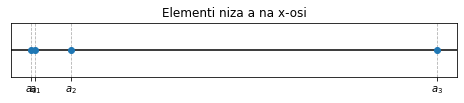

In [57]:
plt.axhline(color='black', zorder=-1)
plt.plot(a,np.zeros(4),'o')
plt.rcParams["figure.figsize"] = (8,1)
plt.title("Elementi niza a na x-osi")
labele=[]
for i in range(4):
    deo=r"$a_{"+str(i)+"}$"
    labele=labele+[deo]
plt.xticks(a,labele)
plt.yticks([])
plt.grid(b=True, which='major', linestyle='--');

In [58]:
b=np.geomspace(1,1000,5)
b

array([   1.        ,    5.62341325,   31.6227766 ,  177.827941  ,
       1000.        ])

In [59]:
1000**(1/4)

5.623413251903491

In [60]:
c=np.geomspace(1,1000,10)
c

array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])

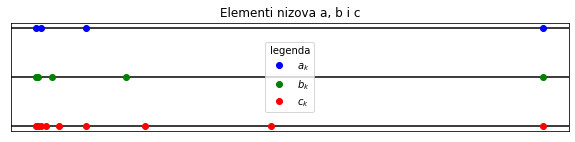

In [62]:
plt.axhline(color='black', zorder=-1)
plt.axhline(y=1, color='black', zorder=-1)
plt.axhline(y=-1, color='black', zorder=-1)
plt.plot(a,np.ones(4),'ob', label=r"$a_k$")
plt.plot(b,np.zeros(5),'og', label=r"$b_k$")
plt.plot(c,-np.ones(10),'or', label=r"$c_k$")
plt.rcParams["figure.figsize"] = (10,2)
plt.title("Elementi nizova a, b i c")
plt.xticks([])
plt.yticks([])
plt.legend(loc='center', title='legenda');

In [63]:
np.geomspace(1, 256, 9)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256.])

In [64]:
256**(1/8)

2.0

In [65]:
np.geomspace(2, 7, 4)

array([2.        , 3.03658897, 4.61043629, 7.        ])

In [66]:
2*((7/2)**(1/3))

3.0365889718756622

Prethodni primeri pokazuju osnovnu upotrebu funkcija `linspace`, `logspace` i `geomspace` za automatsko generisanje jednodimenzionalnih vektora. One mogu da se kombinuju za generisanje nizova nizova, tj. matrica. Mogu se vrste pojedinačno zadavati kroz ove naredbe, ili koristiti jedna naredba za definisanje pravilnosti duž svih kolona ili vrsta. Drugim rečima, ukoliko nešto želimo da izvršavamo kolonu-po-kolonu, odgovarajuća naredba mora da sadrži opcioni argument `axis=1`. Ukoliko se odgovarajući postupak sprovodi vrsta-po-vrsta, opcioni argument `axis=0` nema potrebe navoditi pošto mu je to podrazumevana vrednost. Napomenimo da nemaju sve NumPy naredbe ovu opciju.

In [67]:
m=np.array([np.arange(1,6),np.linspace(10,13,5)])
m

array([[ 1.  ,  2.  ,  3.  ,  4.  ,  5.  ],
       [10.  , 10.75, 11.5 , 12.25, 13.  ]])

In [68]:
np.linspace([1,2,3],[11,12,13],5)

array([[ 1. ,  2. ,  3. ],
       [ 3.5,  4.5,  5.5],
       [ 6. ,  7. ,  8. ],
       [ 8.5,  9.5, 10.5],
       [11. , 12. , 13. ]])

In [69]:
np.linspace([1,2,3],[11,12,13],5,axis=1)

array([[ 1. ,  3.5,  6. ,  8.5, 11. ],
       [ 2. ,  4.5,  7. ,  9.5, 12. ],
       [ 3. ,  5.5,  8. , 10.5, 13. ]])

Osim ovih načina generisanja vektora i matrica, postoje i opcije za direktno kreiranje specijalnih klasa matrica. U njih spadaju jedinična matrica $I,$ nula-matrica $O,$ matrica sa svim jedinicama, dijagonalne matrice, trougaone itd.

### Јединична матрица

Jedinična matrica odgovarajuće dimenzije kreira se pozivom funkcije [eye](https://numpy.org/devdocs/reference/generated/numpy.eye.html). Njene osnovne opcije i dejstvo prikazani su kroz naredne primere.

In [70]:
np.eye(3)                 #kvadratna matrica

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [71]:
np.eye(3,4)               #pravougaona matrica

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [72]:
np.eye(3,2)               #pravougaona matrica

array([[1., 0.],
       [0., 1.],
       [0., 0.]])

In [73]:
np.eye(3,5,2)              #pravougaona matrica sa pomerajem desno od glavne dijagonale

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [74]:
np.eye(3,5,-1)              #pravougaona matrica sa pomerajem levo od glavne dijagonale

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [75]:
np.eye(3,3,-2)              #kvadratna matrica sa pomerajem levo od glavne dijagonale

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

Векторе природне базе простора $\mathbb{R}^4$ можемо да конструишемо као векторе-колоне помоћу помераја јединице дуж дијагонале.

In [76]:
e1=np.eye(4,1)
e2=np.eye(4,1,-1)
e3=np.eye(4,1,-2)
e4=np.eye(4,1,-3)
print("e1=",e1)
print("e2=",e2)
print("e3=",e3)
print("e4=",e4)

e1= [[1.]
 [0.]
 [0.]
 [0.]]
e2= [[0.]
 [1.]
 [0.]
 [0.]]
e3= [[0.]
 [0.]
 [1.]
 [0.]]
e4= [[0.]
 [0.]
 [0.]
 [1.]]


### Дијагоналне матрице

Dijagonalne matrice mogu da se kreiraju navođenjem liste ili niza dijagonalnih elemenata. Osim toga, dijagonalna matrica može da se kreira izvlačenjem dijagonalnih elemenata iz neke druge matrice. Ovu operaciju obavlja funkcija [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html). Njene osnovne opcije i dejstvo prikazani su primerima.

In [77]:
np.diag([1,2,3])                 #dijagonalna matrica sa zadatim dijagonalnim elementima

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [78]:
np.diag([1,2,3],1)            #matrica sa pomerajem dijagonalnih elemenata desno od glavne dijagonale 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [79]:
np.diag([1,2,3],-2)            #matrica sa pomerajem dijagonalnih elemenata levo od glavne dijagonale 

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0]])

In [80]:
matrica=np.array(3*[[1,2,3,4]])   #operacije nad listama u službi generisanja nizova
matrica

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [81]:
np.diag(matrica)   #izvlačenje dijagonalnih elemenata iz postojeće matrice

array([1, 2, 3])

In [82]:
np.diag(matrica,1)   #izvlačenje dijagonalnih elemenata sa pomerajem dijagonale

array([2, 3, 4])

In [83]:
np.diag(np.diag(matrica))  #kreiranje dijagonalne matrice na osnovu vektora

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [84]:
np.diag(np.diag(matrica,1),-1)

array([[0, 0, 0, 0],
       [2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 4, 0]])

### Нула-матрица

Matrica čiji su svi elementi nule dobija se naredbom [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). 

In [85]:
np.zeros(3)                 #matrica-vrsta

array([0., 0., 0.])

In [86]:
np.zeros((3,3))              #kvadratna matrica

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [87]:
np.zeros((3,4))               #pravougaona matrica

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Матрица свих јединица

Slično prethodnoj naredbi, matrica čiji su svi elementi jednaki 1 dobija se naredbom [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html).

In [88]:
np.ones(3)                 #matrica-vrsta

array([1., 1., 1.])

In [89]:
np.ones((3,3))              #kvadratna matrica

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [90]:
np.ones((3,4))               #pravougaona matrica

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### Троугаоне матрице

Izdvajanje trougaonog dela matrice, bilo donje trougaoni ili gornje trougaoni, omogućeno je specijalizovanim funkcijama NumPy biblioteke kao što su [tril](https://numpy.org/doc/stable/reference/generated/numpy.tril.html) i [triu](https://numpy.org/doc/stable/reference/generated/numpy.triu.html). I ove funkcije koriste opcioni argument definisanja reda dijagonale na koju se odnosi ekstrakcija elemenata. 

In [91]:
matrica

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [92]:
np.tril(matrica)

array([[1, 0, 0, 0],
       [1, 2, 0, 0],
       [1, 2, 3, 0]])

In [93]:
np.tril(matrica,1)

array([[1, 2, 0, 0],
       [1, 2, 3, 0],
       [1, 2, 3, 4]])

In [94]:
np.tril(matrica,-1)

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 2, 0, 0]])

In [95]:
np.triu(matrica)

array([[1, 2, 3, 4],
       [0, 2, 3, 4],
       [0, 0, 3, 4]])

In [96]:
np.triu(matrica,2)

array([[0, 0, 3, 4],
       [0, 0, 0, 4],
       [0, 0, 0, 0]])

In [97]:
np.triu(matrica,-1)

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [0, 2, 3, 4]])

### Вандермондова матрица

Pravougaona ili kvadratna matrica sa stepenima navedenih elemenata dobija se naredbom [vander](https://numpy.org/doc/stable/reference/generated/numpy.vander.html). Broj vrsta definisan je ulaznim nizom elemenata. Broj kolona `n` je opcioni argument. Sintaksa 
```python
numpy.vander([a0,a1,...,am], [n=m],[increasing=False])
```
proizvodu matricu $\begin{bmatrix}a_0^{n-1}&a_0^{n-2}&\dots&a_0&1\\
a_1^{n-1}&a_1^{n-2}&\dots&a_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
a_m^{n-1}&a_m^{n-2}&\dots&a_m&1\end{bmatrix}.$

In [98]:
np.vander([1,2,3])

array([[1, 1, 1],
       [4, 2, 1],
       [9, 3, 1]])

Kada se opcioni argument `increasing` postavi na `True` dobijamo stepene duž vrsta u rastućem poretku.

In [99]:
np.vander([1,2,3],increasing=True)

array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]])

In [100]:
np.vander([-1,2,3],2)

array([[-1,  1],
       [ 2,  1],
       [ 3,  1]])

In [101]:
np.vander([-1,2,3],5)

array([[ 1, -1,  1, -1,  1],
       [16,  8,  4,  2,  1],
       [81, 27,  9,  3,  1]])

Još načina zadavanja vektora i matrica upoznaćemo kroz naredne radne sveske. 

## Атрибути података типа NumPy array

Već smo predstavili nekoliko tipova funkcija kroz glavnu Python biblioteku i NumPy koje imaju svoje dejstvo na objekte tipa `array`. To su funkcije opštijeg karaktera, drugim rečima, neke od njih mogu da se koriste i u situacijama kada argumenti nisu nizovnog tipa. Tako, npr. funkcija `len` iz standardne Python biblioteke vraća dužinu nizova, lista ili stringova. Specijalno, u narednoj kodnoj ćeliji je primenjena na niz.

In [102]:
vrsta=np.arange(1,7)
print(vrsta)
len(vrsta)              #dužina niza

[1 2 3 4 5 6]


6

Slično možemo da koristimo funkciju `np.abs()` kao univerzalnu funkciju za određivanje apsolutne vrednosti ili modula kompleksnog broja.

In [103]:
print(prvi_vektor)
np.abs(prvi_vektor)

[ 1.  -1.   2.   3.5  0. ]


array([1. , 1. , 2. , 3.5, 0. ])

In [104]:
print(kompl_kolona)
np.abs(kompl_kolona)

[[ 0. +1.j ]
 [ 1. +0.j ]
 [ 3.1+4.2j]
 [-0. -2.j ]]


array([[1.        ],
       [1.        ],
       [5.22015325],
       [2.        ]])

In [105]:
print(kompl_matr)
np.abs(kompl_matr)

[[ 0.+1.j  2.+1.j]
 [ 0.+0.j -1.+0.j]
 [ 2.-1.j -0.-2.j]]


array([[1.        , 2.23606798],
       [0.        , 1.        ],
       [2.23606798, 2.        ]])

Ovakvi primeri ukazuju na operacijsku raznovrsnost rada u Pythonu. Ipak, NumPy biblioteka svojim specijalizovanim funkcijama i metodima omogućava efikasniju obradu podataka tipa niz. Zbog toga je preporuka da se univerzalne funkcije poput `len` zamene odgovarajućim funkcijama ovog modula. To se realizuje kroz funkcije i atribute tipa podataka `numpy.array`. 

Jedna od prednosti Python jezika jeste što poseduje i implementacije koje imaju dejstvo funkcija, ali se formalno ne zovu tako: to su metodi koji se povezuju sa određenim tipom objekata. U opštem slučaju, objekat u Pythonu povezuje se sa određenim skupom atributa. Njih predstavljaju  promenljive instance (promenljive koje menjaju svoju vrednost od objekta do objekta - karakteristike objekta) ili specijalizovani pozivi funkcija koje zovemo metodima. NumPy niz predstavlja jednu vrstu Python objekta i shodno tome za njega su vezani određeni atributi. Promenljivim instancama se pristupa navođenjem odogovarajućih imena na sledeći način: 
```python
ime_niza.ime_instance
```
Promenljive instance označavaju osobine objekata koje se pamte zajedno sa samim objektom i ne zahtevaju dodatna izračunavanja. Python ih samo pročita iz odgovarajuće memorijske lokacije i vrati vrednost. U atribute ovog tipa za NumPy nizove spadaju podaci  kao što su npr. **shape** - oblik $(m\times n),$ ukupan broj elemenata niza -**size** $(m\cdot n),$ broj dimenzija - **ndim**, itd.. Za kompleksne matrice postoje atributi za prepoznavanje realnog i imaginarnog dela elemenata u matrici - **real** i **imag**. Narednom tabelom data je lista atributa i opis njihovog sadržaja.

|atribut|izlaz|
|---|----|
|`size`| broj elmenata u nizu|
|`shape`| broj vrsta, kolona, itd.|
|`ndim`| broj dimenzija niza|
|`nbytes`|zauzet memorijski prostor nizom u bajtovima|
|`itemsize`|zauzet memorijski prostor elementom u bajtovima|
|`dtype`|tip elemenata niza|
|`real`| realni deo niza|
|`imag`| imaginarni deo niza|

Dejstvo ovih atributa prikazano je kroz primere

In [106]:
#niz realnih vrednosti
a = np.array([0.77779228, 0.26639313, 0.01707315, 0.8379456 , 0.48753544,
       0.86391029, 0.92829293, 0.5879867 , 0.67016366, 0.5778281 ])
print("oblik objekta: ", a.shape)
print("broj dimenzija objekta: ", a.ndim)
print("broj elmenata: ", a.size)
print("tip elemenata: ", a.dtype)
print("veličina jednog elementa u bajtovima: ", a.itemsize)
print("veličina objekta u bajtovima: ", a.nbytes)

oblik objekta:  (10,)
broj dimenzija objekta:  1
broj elmenata:  10
tip elemenata:  float64
veličina jednog elementa u bajtovima:  8
veličina objekta u bajtovima:  80


In [107]:
#niz celobrojnih vrednosti
niz=np.arange(7)

In [108]:
print("oblik objekta: ", niz.shape)
print("broj dimenzija objekta: ", niz.ndim)
print("broj elmenata: ", niz.size)
print("tip elemenata: ", niz.dtype)
print("veličina jednog elementa u bajtovima: ", niz.itemsize)
print("veličina objekta u bajtovima: ", niz.nbytes)

oblik objekta:  (7,)
broj dimenzija objekta:  1
broj elmenata:  7
tip elemenata:  int32
veličina jednog elementa u bajtovima:  4
veličina objekta u bajtovima:  28


In [109]:
kolona

array([[1],
       [2],
       [3]])

In [110]:
print("oblik objekta: ", kolona.shape)
print("broj dimenzija objekta: ", kolona.ndim)
print("broj elmenata: ", kolona.size)
print("tip elemenata: ", kolona.dtype)
print("veličina jednog elementa u bajtovima: ", kolona.itemsize)
print("veličina objekta u bajtovima: ", kolona.nbytes)

oblik objekta:  (3, 1)
broj dimenzija objekta:  2
broj elmenata:  3
tip elemenata:  int32
veličina jednog elementa u bajtovima:  4
veličina objekta u bajtovima:  12


Izlaze atributa možemo da koristimo za definiciju vrednosti promenljivih poput izlaza standardnih Python funkcija.

In [111]:
m,n=kolona.shape
print(m)
print(n)

3
1


In [112]:
matrica

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [113]:
print("oblik objekta: ", matrica.shape)
print("broj dimenzija objekta: ", matrica.ndim)
print("broj elmenata: ", matrica.size)
print("tip elemenata: ", matrica.dtype)
print("veličina jednog elementa u bajtovima: ", matrica.itemsize)
print("veličina objekta u bajtovima: ", matrica.nbytes)

oblik objekta:  (3, 4)
broj dimenzija objekta:  2
broj elmenata:  12
tip elemenata:  int32
veličina jednog elementa u bajtovima:  4
veličina objekta u bajtovima:  48


In [114]:
m,n=matrica.shape
print(m)
print(n)

3
4


In [115]:
kompl_matr=np.array([[1j,2+1j],[0,-1],[2-1j,-2j]])
print(kompl_matr)
print("oblik objekta: ", kompl_matr.shape)
print("broj dimenzija objekta: ", kompl_matr.ndim)
print("broj elmenata: ", kompl_matr.size)
print("tip elemenata: ", kompl_matr.dtype)
print("veličina jednog elementa u bajtovima: ", kompl_matr.itemsize)
print("veličina objekta u bajtovima: ", kompl_matr.nbytes)

[[ 0.+1.j  2.+1.j]
 [ 0.+0.j -1.+0.j]
 [ 2.-1.j -0.-2.j]]
oblik objekta:  (3, 2)
broj dimenzija objekta:  2
broj elmenata:  6
tip elemenata:  complex128
veličina jednog elementa u bajtovima:  16
veličina objekta u bajtovima:  96


In [116]:
kompl_matr.real

array([[ 0.,  2.],
       [ 0., -1.],
       [ 2., -0.]])

In [117]:
kompl_matr.imag

array([[ 1.,  1.],
       [ 0.,  0.],
       [-1., -2.]])

Nizovi zbog svoje efikasnije funkcionalnosti podležu određenim pravilima. Svi elementi niza moraju biti brojevi istog tipa. Dakle svi će se tretirati ili kao celi brojevi ili kao brojevi u pokretnom zarezu ili kao kompleksni brojevi. Shodno tome moguća su odstupanja u rezultatu  od očekivanog prilikom rada sa nizovima. Iznenađenja se mogu izbeći navođenjem tipa brojeva kome pripadaju elementi matrice. Način deklaracije je
```python
ime_niza=np.array([elementi],dtype=np.ime_tipa)
```

Na raspolaganju su sledeći numerički formati:

|dtype|varijante|vrsta brojeva|
|---|---|---|
|int| int8, int16, int32, int64| Celi brojevi $Z$|
|uint| uint8, uint16, uint32, uint64| Celi brojevi bez znaka $N_0$|
|bool| Bool Boolean |Tačno/Netačno tj. $1/0$|
|float| float16, float32, float64, float128| realni brojevi u pokretnom zarezu|
|complex| complex64, complex128, complex256| kompleksni brojevi u pokretnom zarezu|

Primetimo da elementi NumPy niza mogu da budu i logičke (bool) vrednosti. To je veoma pogodna osobina koju ćemo posebno analizirati u okviru radne sveske o ovom tipu podataka.

Prilikom definicije NumPy nizova tip podataka koje sadrže može i korisnički da se definiše. Kroz primere navodimo neke načine definisanja tipa podataka elemenata NumPy niza.

In [118]:
matrica=np.array([[1,2],[3,4],[5,6]],dtype=np.float16)
matrica

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [119]:
print("oblik objekta: ", matrica.shape)
print("broj dimenzija objekta: ", matrica.ndim)
print("broj elmenata: ", matrica.size)
print("tip elemenata: ", matrica.dtype)
print("veličina jednog elementa u bajtovima: ", matrica.itemsize)
print("veličina objekta u bajtovima: ", matrica.nbytes)

oblik objekta:  (3, 2)
broj dimenzija objekta:  2
broj elmenata:  6
tip elemenata:  float16
veličina jednog elementa u bajtovima:  2
veličina objekta u bajtovima:  12


In [120]:
matrica=np.array(matrica,dtype=np.int8)
print("oblik objekta: ", matrica.shape)
print("broj dimenzija objekta: ", matrica.ndim)
print("broj elmenata: ", matrica.size)
print("tip elemenata: ", matrica.dtype)
print("veličina jednog elementa u bajtovima: ", matrica.itemsize)
print("veličina objekta u bajtovima: ", matrica.nbytes)

oblik objekta:  (3, 2)
broj dimenzija objekta:  2
broj elmenata:  6
tip elemenata:  int8
veličina jednog elementa u bajtovima:  1
veličina objekta u bajtovima:  6


In [121]:
kolona=kolona.astype(np.float)
print("oblik objekta: ", kolona.shape)
print("broj dimenzija objekta: ", kolona.ndim)
print("broj elmenata: ", kolona.size)
print("tip elemenata: ", kolona.dtype)
print("veličina jednog elementa u bajtovima: ", kolona.itemsize)
print("veličina objekta u bajtovima: ", kolona.nbytes)

oblik objekta:  (3, 1)
broj dimenzija objekta:  2
broj elmenata:  3
tip elemenata:  float64
veličina jednog elementa u bajtovima:  8
veličina objekta u bajtovima:  24


Objekti u Pythonu su povezani i sa određenim brojem specijalizovanih funkcija koji se zovu metodi. Metodi podrazumevaju da za odgovarajući odgovor na zahtev Python mora da obavi određena izračunavanja. Metodima se pristupa na način sličan promenljivim instancama, 
```python
ime_niza.ime_metoda()
```
Razlika se ogleda u paru zagrada koje se navode nakom imena metoda, što je u skladu sa pozivima funkcija u Pythonu. Vrlo često metodi rade bez poziva argumenata između zagrada, s obzirom da im je glavni argument već zadat imenom objekta ispred. U nekim situacijama, kada su potrebni dodatni argumenti prilikom poziva metoda, takvi argumenti se navode unutar zagrada. Primeri metoda koji su namenjeni dodatnim funkcijama nad nizovima predstavljaju sortiranje, izračunavanje srednje vrednosti, ili standardne devijacije. 

|metod|opis dejstva|
|---|---|
|`sum()`|suma elemenata niza|
|`cumsum()`|kumulativna suma elemenata niza|
|`mean()`| srednja vrednost elemenata niza|
|`std()`| standardna devijacija elemenata niza| 
|`var()`| varijansa elemenata niza| 
|`min()`| vraća minimalni element niza| 
|`max()`| vraća maksimalni element niza| 
|`sort()`| sortiranje u rastući niz| 
|`clip(opseg)`| odsecanje vrednosti izvan opsega| |
|`reshape(a, b)`| promena oblika, tj. dimenzija u $a\times b$| 
|`conj() `|konjugovanje svih elemenata niza| 

Matematički opis pojedinih gornjih metoda, za ulazni argument $v=[x_0,x_1,\dots,x_n]:$
\begin{align}
&\mbox{sum(v)}=\displaystyle\sum_{k=0}^nx_k,\\
&\mbox{cumsum(v)}=a,\quad a=[a_0,a_1,\dots,a_n],\quad a_k=\displaystyle\sum_{i=0}^kx_i,\\
&\mbox{mean(v)}=\dfrac1{n+1}\displaystyle\sum_{k=0}^nx_k=\mu(v),\\
&\mbox{std(v)}=\sqrt{\dfrac1{n+1}\displaystyle\sum_{k=0}^n|x_k-\mu(v)|^2},\\
&\mbox{var(v)}=\mbox{std(v)}^2,\\
&\mbox{min(v)}=\min\{x_0,x_1,\dots,x_n\},\\
&\mbox{max(v)}=\max\{x_0,x_1,\dots,x_n\},\\
&\mbox{conj(v)}=a,\quad a=[\overline{x_0},\overline{x_1},\dots,\overline{x_n}].
\end{align}

In [122]:
print(niz)
print('zbir svih elemenata je: ',niz.sum())
print('kumulativna suma je: ',niz.cumsum())
print('srednja vrednost elemenata je: ',niz.mean())
print('standardna devijacija je: ',niz.std())
print('varijansa je: ',niz.var())
print('minimalni element je: ',niz.min())
print('maksimalni element je: ',niz.max())

[0 1 2 3 4 5 6]
zbir svih elemenata je:  21
kumulativna suma je:  [ 0  1  3  6 10 15 21]
srednja vrednost elemenata je:  3.0
standardna devijacija je:  2.0
varijansa je:  4.0
minimalni element je:  0
maksimalni element je:  6


In [123]:
print(matrica)
print('zbir svih elemenata je: ',matrica.sum())
print('kumulativna suma je: ',matrica.cumsum())
print('srednja vrednost elemenata je: ',matrica.mean())
print('standardna devijacija je: ',matrica.std())
print('varijansa je: ',matrica.var())
print('minimalni element je: ',matrica.min())
print('maksimalni element je: ',matrica.max())

[[1 2]
 [3 4]
 [5 6]]
zbir svih elemenata je:  21
kumulativna suma je:  [ 1  3  6 10 15 21]
srednja vrednost elemenata je:  3.5
standardna devijacija je:  1.707825127659933
varijansa je:  2.9166666666666665
minimalni element je:  1
maksimalni element je:  6


In [124]:
print('zbir elemenata po kolonama: ',matrica.sum(axis=0))
print('kumulativna suma po kolonama: ',matrica.cumsum(axis=0))
print('srednja vrednost po kolonama: ',matrica.mean(axis=0))
print('standardna devijacija po kolonama: ',matrica.std(axis=0))
print('varijansa po kolonama: ',matrica.var(axis=0))
print('minimalni element po kolonama: ',matrica.min(axis=0))
print('maksimalni element po kolonama: ',matrica.max(axis=0))

zbir elemenata po kolonama:  [ 9 12]
kumulativna suma po kolonama:  [[ 1  2]
 [ 4  6]
 [ 9 12]]
srednja vrednost po kolonama:  [3. 4.]
standardna devijacija po kolonama:  [1.63299316 1.63299316]
varijansa po kolonama:  [2.66666667 2.66666667]
minimalni element po kolonama:  [1 2]
maksimalni element po kolonama:  [5 6]


In [125]:
print('zbir elemenata po vrstama: ',matrica.sum(axis=1))
print('kumulativna suma po vrstama: ',matrica.cumsum(axis=1))
print('srednja vrednost po vrstama: ',matrica.mean(axis=1))
print('standardna devijacija po vrstama: ',matrica.std(axis=1))
print('varijansa po vrstama: ',matrica.var(axis=1))
print('minimalni element po vrstama: ',matrica.min(axis=1))
print('maksimalni element po vrstama: ',matrica.max(axis=1))

zbir elemenata po vrstama:  [ 3  7 11]
kumulativna suma po vrstama:  [[ 1  3]
 [ 3  7]
 [ 5 11]]
srednja vrednost po vrstama:  [1.5 3.5 5.5]
standardna devijacija po vrstama:  [0.5 0.5 0.5]
varijansa po vrstama:  [0.25 0.25 0.25]
minimalni element po vrstama:  [1 3 5]
maksimalni element po vrstama:  [2 4 6]


Kodne ćelije u nastavku ilustruju upotrebu nekih od metoda za rad sa nizovima. Napomenimo da metod `sort()` vrši trajnu promenu redosleda elemenata niza, bez naredbe dodele. Metod `clip(opseg)` je primer metoda koji koristi dodatne argumente. Oni predstavljaju donju i gornju granicu vrednosti unutar koje se odsecaju elementi niza. Dakle, ako je element niza sa vrednošću između donje i gornje granice on ostaje u nizu. U suprotnom element se zaokružuje na najbližu granicu opsega.

In [126]:
vrsta=np.arange(-1,3,0.45)
vrsta.shape

(9,)

Na atribut **shape** može se uticati naredbom **reshape**.

In [127]:
vrsta.reshape(9,1)

array([[-1.  ],
       [-0.55],
       [-0.1 ],
       [ 0.35],
       [ 0.8 ],
       [ 1.25],
       [ 1.7 ],
       [ 2.15],
       [ 2.6 ]])

In [128]:
vrsta.reshape(1,9)

array([[-1.  , -0.55, -0.1 ,  0.35,  0.8 ,  1.25,  1.7 ,  2.15,  2.6 ]])

In [129]:
vrsta.reshape(3,3)

array([[-1.  , -0.55, -0.1 ],
       [ 0.35,  0.8 ,  1.25],
       [ 1.7 ,  2.15,  2.6 ]])

In [130]:
vrsta

array([-1.  , -0.55, -0.1 ,  0.35,  0.8 ,  1.25,  1.7 ,  2.15,  2.6 ])

In [131]:
print(a)
a.clip(0.3, 0.8)

[0.77779228 0.26639313 0.01707315 0.8379456  0.48753544 0.86391029
 0.92829293 0.5879867  0.67016366 0.5778281 ]


array([0.77779228, 0.3       , 0.3       , 0.8       , 0.48753544,
       0.8       , 0.8       , 0.5879867 , 0.67016366, 0.5778281 ])

In [132]:
a

array([0.77779228, 0.26639313, 0.01707315, 0.8379456 , 0.48753544,
       0.86391029, 0.92829293, 0.5879867 , 0.67016366, 0.5778281 ])

Veoma važno svojstvo nizova je da dodela vrednosti **niz1=niz2** ne funkcioniše na uobičajen način.

In [133]:
u=np.array([1,2,3])
a=u

In [134]:
a[0]=-1
print(u)

[-1  2  3]


In [135]:
u[0]=1
print(a)

[1 2 3]


Drugim rečima, kada se celokupan sadržaj jednog niza dodeli drugom ne stvara se nezavisna kopija vrednosti. Promene u jednom objektu dovode do promena i u drugom. Za pravljenje nezavisnih kopija objekata koristi se metod **copy**.

In [136]:
a=u.copy()
a[0]=2
print(a)
print(u)

[2 2 3]
[1 2 3]


In [137]:
u[2]=2
print(a)
print(u)

[2 2 3]
[1 2 2]


#### Napomena o listama

Ukoliko rezervisana reč `numpy.array` nije navedena kreirani objekat između uglastih zagrada `[]` naziva se **lista**. [Liste](https://docs.python.org/3/tutorial/datastructures.html) su još jedna vrsta podataka u Python-u, slične su NumPy nizovima. Za razliku od NumPy nizova, liste su deo standardne bibliteke Python-a. Liste  imaju svoje koristi u primeni. Ipak, liste nemaju rutine i alate kojima se efikasno izračunavaju i rešavaju problemi linearne algebre i matematičke analize. Zbog toga nisu u fokusu rada ovog predmeta, već samo pomoćno ili prelazno sredstvo koje povremeno koristimo da skratimo sam proces pisanja programskog koda.

**Primer 4.** Kreiraćemo listu i posmatrati efekte ispisa vrednosti i konverzije između dva tipa podataka: niza i liste.

In [138]:
lista=[1,-1,2,3.5,0]
lista

[1, -1, 2, 3.5, 0]

In [139]:
print(lista)

[1, -1, 2, 3.5, 0]


Lista može postati NumPy niz odgovarajućom deklaracijom, podsećamo na rezervisanu reč `array`.

In [140]:
niz=np.array(lista)
niz

array([ 1. , -1. ,  2. ,  3.5,  0. ])

Postupak se može i preokrenuti prebacivanjem niza u listu. Sintaksa postupka `tolist` je:
```python
ime_liste=ime_niza.tolist()
```
i ne koristi nikakve argumente.

In [141]:
lista2=niz.tolist()
lista2

[1.0, -1.0, 2.0, 3.5, 0.0]

In [142]:
lista3=matrica.tolist()
lista3

[[1, 2], [3, 4], [5, 6]]